In [2]:
from simulators.iam_module import prepare_iam_model_spectra, continuum_alpha, continuum, inherent_alpha_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

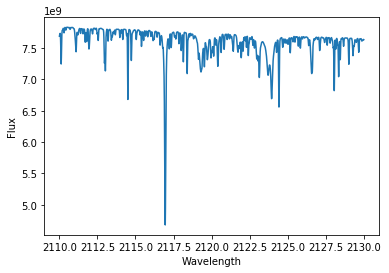

In [38]:
mod1_spec, mod2_spec = prepare_iam_model_spectra([5000,4.5, 0.0], [2400, 4.5, 0.0], limits=[2110, 2130],
                                                  area_scale=True, wav_scale=True)

mod1_spec.plot()

Order of approximation (N):  0
    Size of beta sample:  998
    Robust estimate of noise std: 0.0061454 +/- 0.0002763
Order of approximation (N):  1
    Size of beta sample:  996
    Robust estimate of noise std: 0.0054236 +/- 0.0002779
Order of approximation (N):  2
    Size of beta sample:  994
    Robust estimate of noise std: 0.0044003 +/- 0.0002460
Order of approximation (N):  3
    Size of beta sample:  992
    Robust estimate of noise std: 0.0044637 +/- 0.0002664
Order of approximation (N):  4
    Size of beta sample:  990
    Robust estimate of noise std: 0.0042851 +/- 0.0002694
Order of approximation (N):  5
    Size of beta sample:  988
    Robust estimate of noise std: 0.0045894 +/- 0.0003013
Order of approximation (N):  6
    Size of beta sample:  986
    Robust estimate of noise std: 0.0045535 +/- 0.0003103
Order of approximation (N):  7
    Size of beta sample:  984
    Robust estimate of noise std: 0.0046321 +/- 0.0003262


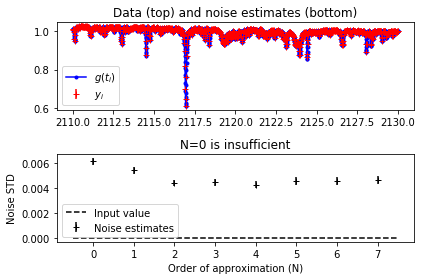

In [54]:
# Use Beta sigma method to access the noise in synthetic spectrum.

from PyAstronomy import pyasl
ti = mod1_spec.xaxis
t2 = np.linspace(ti[0],ti[-1], 1000)
gi = mod1_spec.flux / np.median(mod1_spec.flux)
noise = 0.000
yi = mod1_spec.flux / np.median(mod1_spec.flux) 
y2 = np.interp(t2, ti, yi) + np.random.normal(0, noise*np.ones(1000))
nd=len(y2)

# Create class instance for equidistant sampling
bseq = pyasl.BSEqSamp()

# Specify jump parameter (j) for construction of beta sample
j = 2

# Order of approximation to use
Ns = [0,1,2,3, 4, 5, 6, 7]

# Use to store noise estimates
smads, dsmads = [], []

# Loop over orders of approximation between 0 and 3
for N in Ns:

    # Get estimates of standard deviation based on robust (MAD-based) estimator
    smad, dsmad = bseq.betaSigma(y2, N, j, returnMAD=True)
    print("Order of approximation (N): ", N)

    print("    Size of beta sample: ", len(bseq.betaSample))
    print("    Robust estimate of noise std: %6.7f +/- %6.7f" % (smad, dsmad))
    # Save result
    smads.append(smad)
    dsmads.append(dsmad)

# Plot g(t) and the synthetic data
plt.subplot(2,1,1)
plt.title("Data (top) and noise estimates (bottom)")
plt.plot(ti, gi, 'b.-', label="$g(t_i)$")
plt.errorbar(t2, y2, yerr=np.ones(nd)*noise, fmt='r+', label="$y_i$")
plt.legend()
plt.subplot(2,1,2)
plt.title("N=0 is insufficient")
plt.errorbar(Ns, smads, yerr=dsmads, fmt='k+', label="Noise estimates")
plt.plot([min(Ns)-0.5, max(Ns)+0.5], [noise]*2, 'k--', label="Input value")
plt.legend()
plt.xlabel("Order of approximation (N)")
plt.ylabel("Noise STD")
plt.tight_layout()
plt.show()

